In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_files



In [64]:
df = pd.read_excel('ABC_Consulting_Dataset.xlsx',dtype={'Customer_ID':str, 'Invoice_ID':str})  
df

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680,France


In [ ]:
df.InvoiceDate = pd.to_datetimeatetime(df.Invoice_Date, format="%m")

In [62]:
df.head()

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom


In [63]:
df.tail()

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,12680,France


In [22]:
df.describe()

,Quantity,Unit_Price,Customer_ID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Invoice_Number  541909 non-null  object 
 1   Product_Code    541909 non-null  object 
 2   Description     540455 non-null  object 
 3   Quantity        541909 non-null  int64  
 4   Invoice_Date    541909 non-null  object 
 5   Unit_Price      541909 non-null  float64
 6   Customer_ID     406829 non-null  float64
 7   Country         541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [24]:
541909-406829

135080

In [25]:
df.isna().sum()

Invoice_Number         0
Product_Code           0
Description         1454
Quantity               0
Invoice_Date           0
Unit_Price             0
Customer_ID       135080
Country                0
dtype: int64

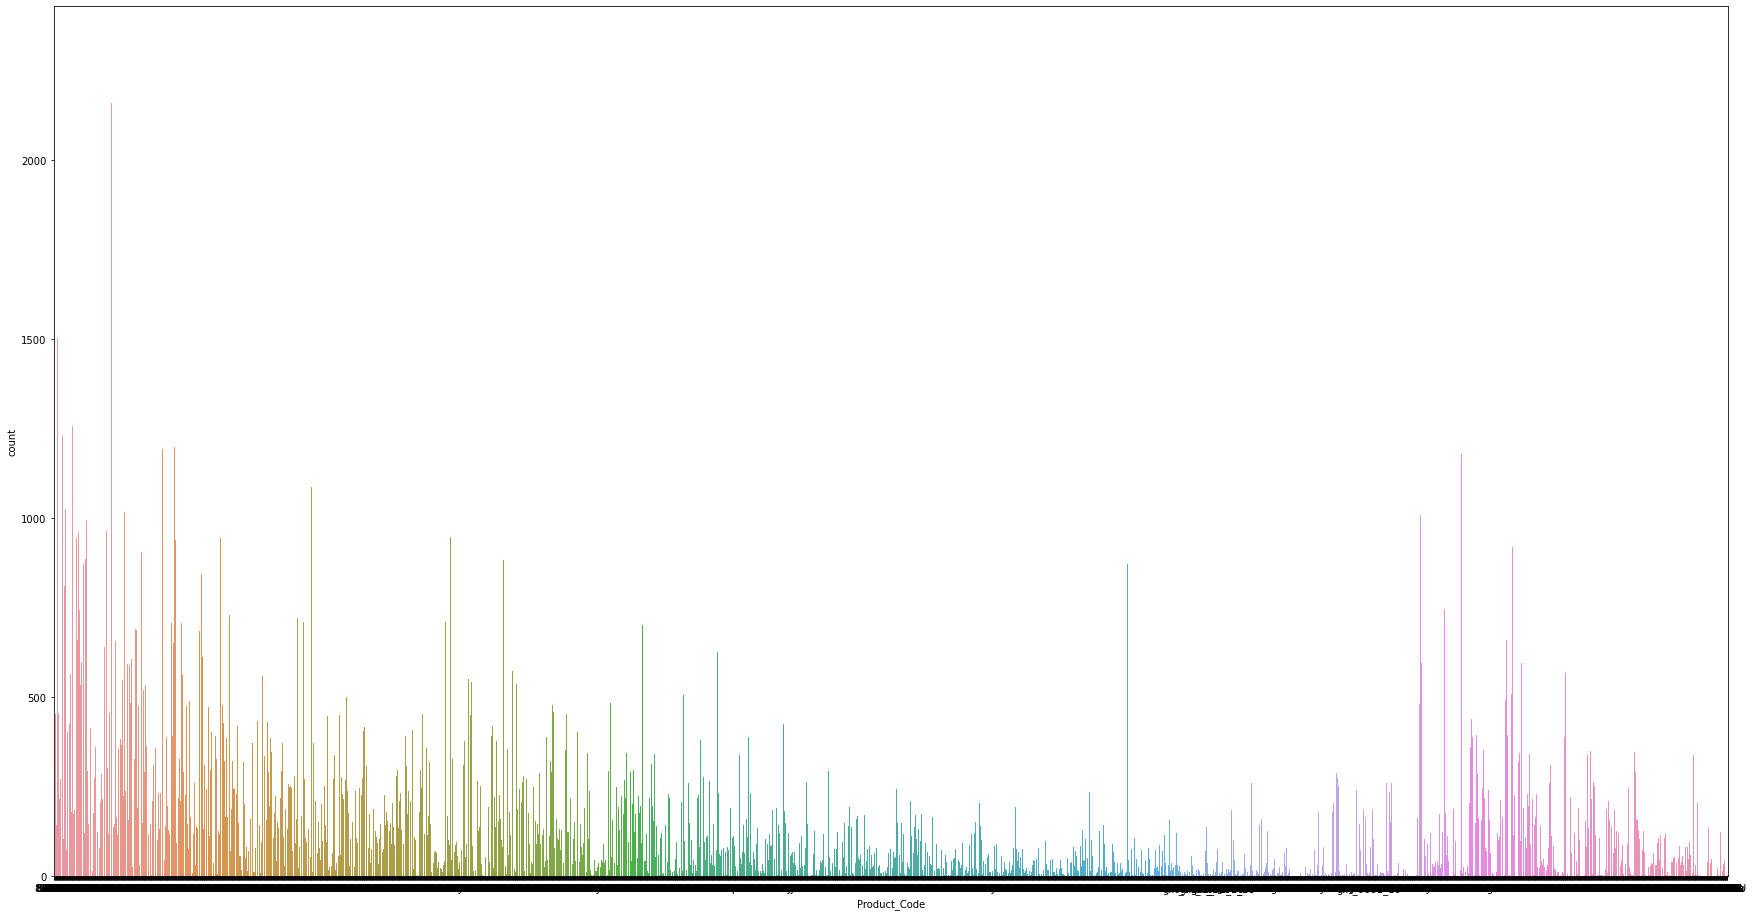

In [30]:
plt.figure(figsize=(30,16))
sns.countplot(df.Product_Code)

In [33]:
df[df['Quantity']<0]=np.nan

In [35]:
df[df['Unit_Price']<0]=np.nan

In [36]:
df.describe()

,Quantity,Unit_Price,Customer_ID
count,531283.000000,531283.000000,397924.000000
mean,10.655299,3.898954,15294.315171
std,156.830617,35.876279,1713.169877
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [38]:
# To Calculate the Total prince in dollars $

df['total_cost_dollars'] = df['Quantity']*df['Unit_Price']
df.describe()

,Quantity,Unit_Price,Customer_ID,total_cost_dollars
count,531283.000000,531283.000000,397924.000000,531283.000000
mean,10.655299,3.898954,15294.315171,20.077218
std,156.830617,35.876279,1713.169877,270.058254
min,1.000000,0.000000,12346.000000,0.000000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,10.000000,4.130000,16795.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


In [39]:
df.head()

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country,total_cost_dollars
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [44]:
# We have to find each Customer made how many orders

invoice_count = df.groupby(by="Customer_ID")['Invoice_Number'].count()
invoice_count.columns=["Customer_ID","NumberOrders"]
invoice_count.describe()         

count    4339.000000
mean       91.708689
std       228.792852
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Invoice_Number, dtype: float64

In [47]:
# How much Money they spent for each Customer

total_spend = df.groupby(by="Customer_ID",as_index=False)['total_cost_dollars'].sum()
total_spend.columns=["Customer_ID",'total_spend']
total_spend.head()

,Customer_ID,total_spend
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [48]:
total_spend.describe()

,Customer_ID,total_spend
count,4339.000000,4339.000000
mean,15299.936852,2053.793018
std,1721.889758,8988.248381
min,12346.000000,0.000000
25%,13812.500000,307.245000
50%,15299.000000,674.450000
75%,16778.500000,1661.640000
max,18287.000000,280206.020000


In [52]:

# How much Money they spent for each Customer

total_spend = df.groupby(by="Customer_ID",as_index=False)['total_cost_dollars'].sum()
total_spend.columns=["Customer_ID",'total_spend']
total_spend.head()

,Customer_ID,total_spend
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [53]:
# How many they bought by each Customer


total_bought = df.groupby(by="Customer_ID",as_index=False)['Quantity'].sum()
total_bought.columns=["Customer_ID",'total_bought']
total_bought.head()

,Customer_ID,total_bought
0,12346.0,74215.0
1,12347.0,2458.0
2,12348.0,2341.0
3,12349.0,631.0
4,12350.0,197.0


In [58]:
# Based on the Customer id at what is the lastly purchased time and date (Invoice_Date)

last_order = df.groupby(by="Customer_ID",as_index=False)["Invoice_Date"].max()
last_order.columns=["Customer_ID","Last_Purchase"]
last_order["Now"] = pd.to_datetime(df['Invoice_Date']).max()
last_order.head()

,Customer_ID,Last_Purchase,Now
0,12346.0,1/18/2011 10:01,2011-12-10 17:19:00
1,12347.0,NaN,2011-12-10 17:19:00
2,12348.0,NaN,2011-12-10 17:19:00
3,12349.0,11/21/2011 9:51,2011-12-10 17:19:00
4,12350.0,2011-02-02 16:01:00,2011-12-10 17:19:00


In [57]:
last_order["days_since_purchase"] = 1+(last_order.Now - last_order.Last_Purchase).astype('timedelta64[D]')
last_order.drop('Now',axis=1)
last_order.head()

c:\users\nethr\appdata\local\programs\python\python36\lib\site-packages\pandas\core\arrays\datetimelike.py:1268: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeArray not vectorized
  PerformanceWarning,


TypeError: unsupported operand type(s) for -: 'Timestamp' and 'str'

In [59]:
data.head()

,Invoice_Number,Product_Code,Description,Quantity,Invoice_Date,Unit_Price,Customer_ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


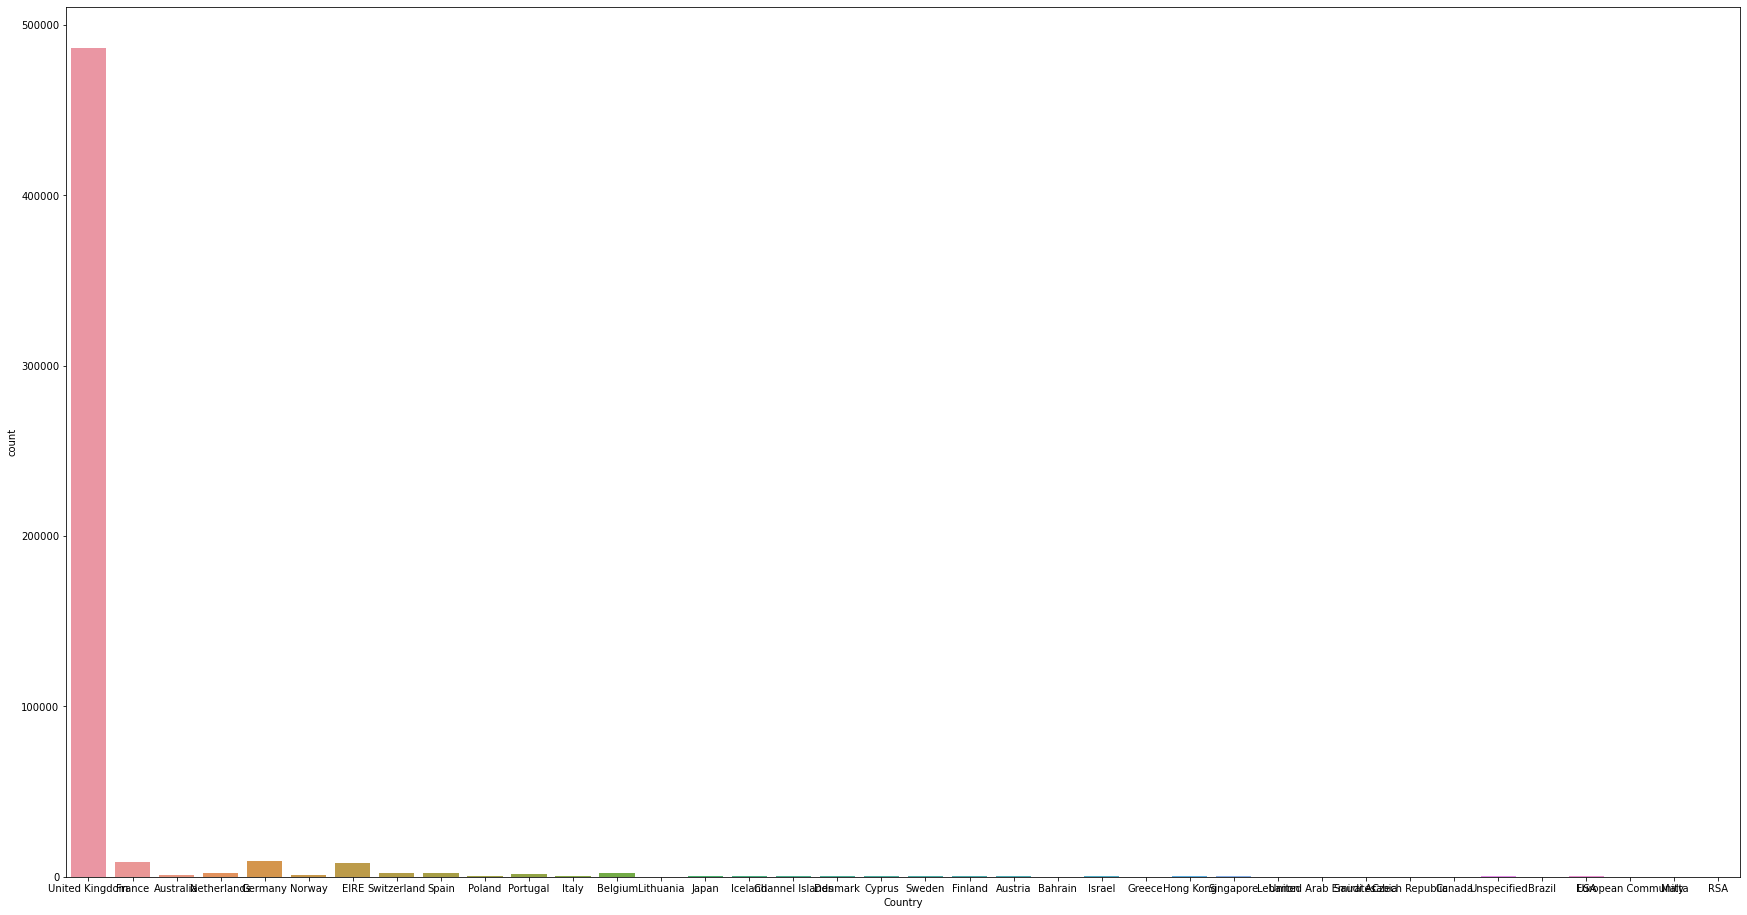

In [60]:
plt.figure(figsize=(30,16))
sns.countplot(df.Country)